In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 50).reshape(-1,1)
y = 2*x+3

In [3]:
xt = torch.Tensor(x)
yt = torch.Tensor(y)

In [4]:
yt.dtype

torch.float32

In [5]:
input_dim = 1
output_dim = 1

In [6]:
# model = torch.nn.Linear(input_dim, output_dim)

In [11]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

In [12]:
model = LinearRegression(input_dim, output_dim)

In [13]:
learning_rate = 0.02
num_epochs = 100

In [14]:
loss = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
loss_list = []

In [16]:
for epoch in range(num_epochs):
    y_hat = model(xt)
    l = loss(yt, y_hat)
    l.backward()
    optim.step()
    optim.zero_grad()
    loss_list.append(l.item())

In [17]:
[w, b] = model.parameters()

In [18]:
print(w)
print(b)

Parameter containing:
tensor([[2.1856]], requires_grad=True)
Parameter containing:
tensor([1.7593], requires_grad=True)


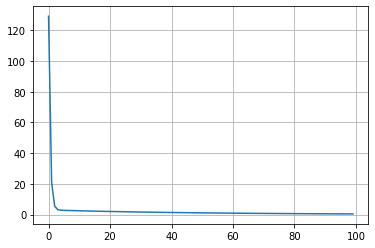

In [19]:
plt.plot(loss_list)
plt.grid()
plt.show()